<a href="https://colab.research.google.com/github/ArthurDF/OpenCV/blob/main/trabalho3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Utilização do algortimo K-means para a criação de filtros de pop-art

A pop-art é um estilo artistico que retrata com vores vibrantes elementos típicos do dia a dia norte-americano

Um dos objetivos dos artistas que encabeçaram esse estilo é retratar a plasticidade do estilo de vida baseado em consumo dos estados unidos e propor uma reflexão acerca destes tópicos 

Andy Warhol o artista simbolo do movimento era conhecido em especial por retratar pessoas famosas, sendo uma das suas obras mais famosa a ilustração da Marilyn Monroe retratada abaixo

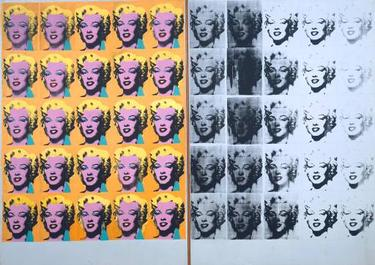

Entretanto parte do público não captou tão bem a mensagem das obras e hoje em dia caracteristicas deste estilo são amplamente utilizadas em peças publicitarias e em propagandas políticas(um exemplo sendo o famoso poster utilizado pela campanha a presidencia de Barack Obama em 2008)

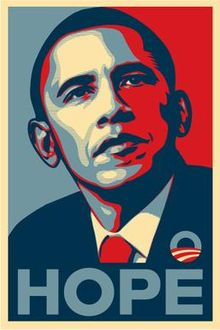

O objetivo deste trabalho é criar uma ferramenta que a partir de uma imagem fornecida pelo usuário crie uma imagem no estilo Pop-Art se utilizando do algoritmo K-Means

Além disso o programa permite editar as cores da imagem gerada de acordo com o desejo do usuário 

### Algoritmo K-Means

O algoritmo K-means tem como objetivo a redução de dimensionalidade de conjuntos de dados a partir da aglomeração de elementos semelhantes em clusters 

Ele é bastante utilizado em aplicações de ciências de dados para categorizar conjuntos complexos e visualizar elementos de muitas dimenções

Entretanto outro uso para esse algoritmo é a compressão de imagens, antigamente algoritmos similares eram bem utilizado para mostrar imagens em sistemas com pouco processamento como video games antigos, abaixo temos uma imagem do popular jogo Mortal Kombat como exemplo de um uso prático para algoritmos de compressão de imagem(observe como os lutadores são na verdade feitos a partir de imagens reais que são extremamente comprimidas para que assim possam ser exibidas pelo hardware do video game)

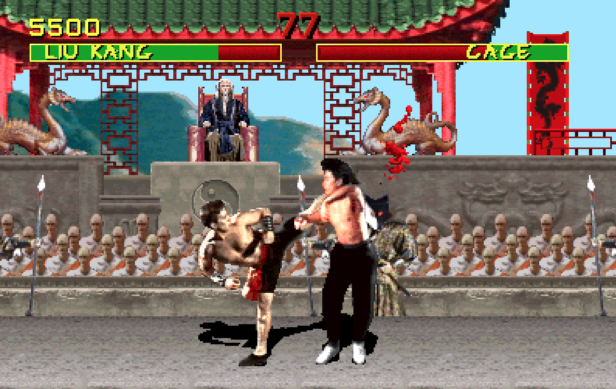!

Entretanto um aspecto interessante do algoritmo K-means quando utilizado com poucos clusters(entre 2 a 4) é justamente a criação de imagens com um estilo similar aquelas de pop-art(chapadas)

Logo ele se torna uma ferramenta interessante para a criação de imagens nesse estilo

Para esse problema seram usadas somente 2 bibliotecas a OpenCV e a Numpy 
abaixo elas são carregadas

In [65]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

Escolhe-se as cores(no padrão BGR) que vão compor a imagem formada

In [43]:
cor_1=np.array([[[0,0,0]]],dtype=np.uint8)
cor_2=np.array([[[232,190,162]]],dtype=np.uint8)
cor_3=np.array([[[232,190,162]]],dtype=np.uint8)
cor_4=np.array([[[120,120,120]]],dtype=np.uint8)

Então define-se o número de clusters utilizados, o numero de rodadas que o algoritmo será rodado e o critério de parada deste algoritmo

In [44]:
n_clusters = 4
n_rodadas = 2
term_crit = (cv.TERM_CRITERIA_COUNT |cv.TERM_CRITERIA_EPS, 10000, 0.0001)

Para este exemplo será usada uma imagem do cantor John Lennon conforme exibida abaixo

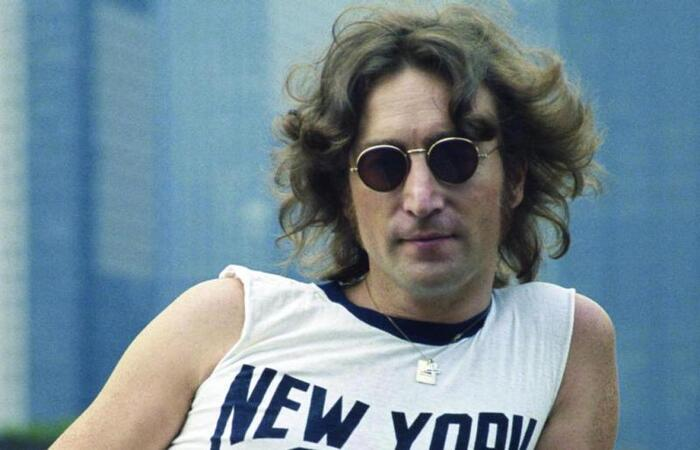

In [45]:
img = cv.imread("john.jpg")
cv2_imshow(img)

Abaixo executamos o algoritmo K-means com um número variado de clusters(cores) para que seja possível se observar o efeito do algoritmo na imagem, observe que quanto mais cores são utilizadas mais proxima ela se torna de uma imagem real. Observe que ao final dos exemplos a imagem é praticamente indistinguivel da imagem original

In [46]:
img_copy = img.reshape((-1,3))
img_copy=np.float32(img_copy)

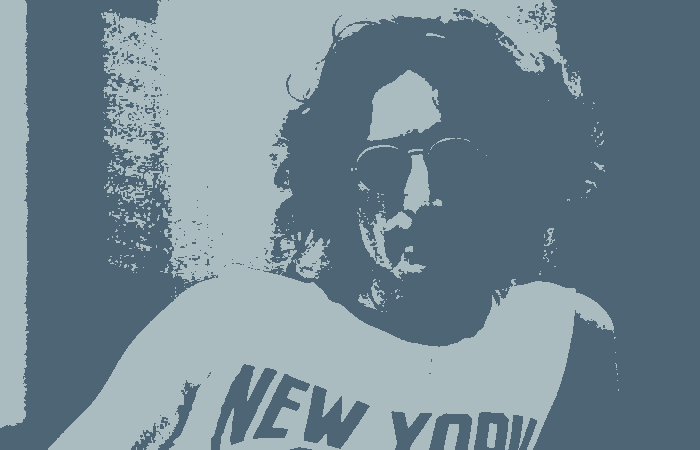

In [47]:
n_clusters = 2

ret,label,center=cv.kmeans(img_copy, n_clusters,None,term_crit,n_rodadas,cv.KMEANS_PP_CENTERS)
center = np.uint8(center)
img_k_means = center[label.flatten()]
img_k_means = img_k_means.reshape((img.shape))
cv2_imshow(img_k_means)

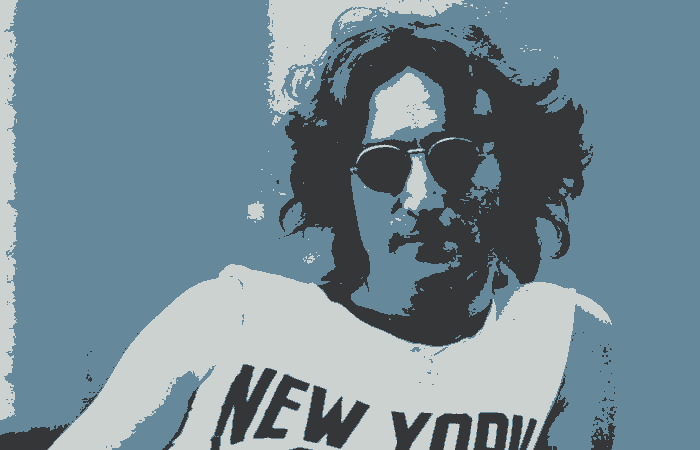

In [58]:
n_clusters = 3

ret,label,center=cv.kmeans(img_copy, n_clusters,None,term_crit,n_rodadas,cv.KMEANS_PP_CENTERS)
center = np.uint8(center)
img_k_means = center[label.flatten()]
img_k_means = img_k_means.reshape((img.shape))
cv2_imshow(img_k_means)

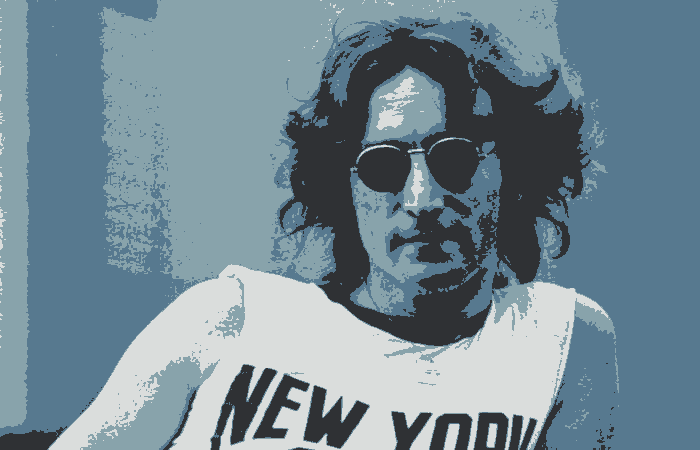

In [49]:
n_clusters = 4

ret,label,center=cv.kmeans(img_copy, n_clusters,None,term_crit,n_rodadas,cv.KMEANS_PP_CENTERS)
center = np.uint8(center)
img_k_means = center[label.flatten()]
img_k_means = img_k_means.reshape((img.shape))
cv2_imshow(img_k_means)

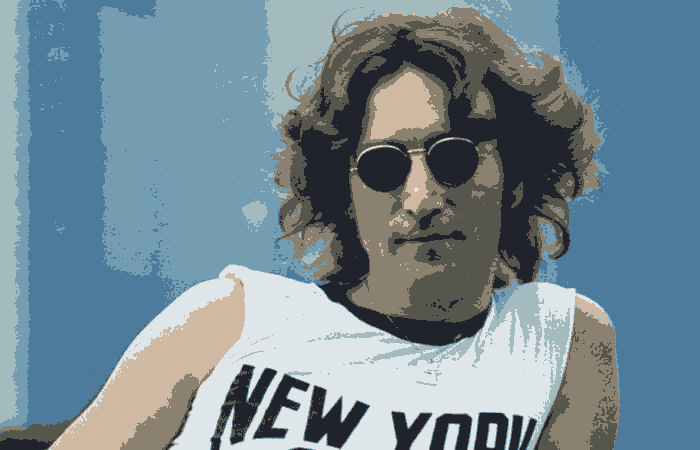

In [50]:
n_clusters = 8

ret,label,center=cv.kmeans(img_copy, n_clusters,None,term_crit,n_rodadas,cv.KMEANS_PP_CENTERS)
center = np.uint8(center)
img_k_means = center[label.flatten()]
img_k_means = img_k_means.reshape((img.shape))
cv2_imshow(img_k_means)

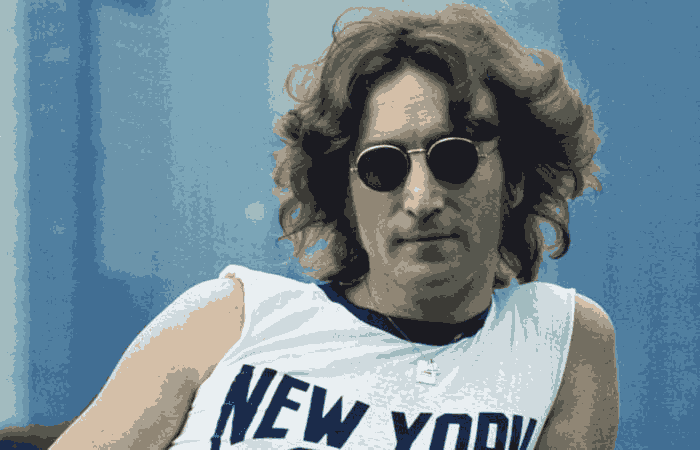

In [51]:
n_clusters = 15

ret,label,center=cv.kmeans(img_copy, n_clusters,None,term_crit,n_rodadas,cv.KMEANS_PP_CENTERS)
center = np.uint8(center)
img_k_means = center[label.flatten()]
img_k_means = img_k_means.reshape((img.shape))
cv2_imshow(img_k_means)

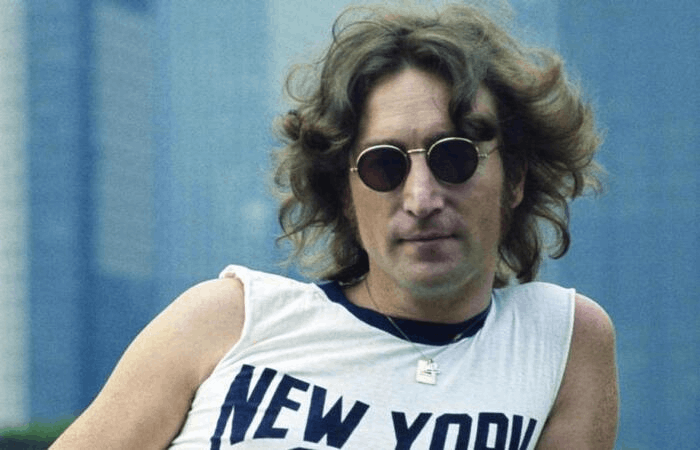

In [67]:
n_clusters = 255

ret,label,center=cv.kmeans(img_copy, n_clusters,None,term_crit,n_rodadas,cv.KMEANS_PP_CENTERS)
center = np.uint8(center)
img_k_means = center[label.flatten()]
img_k_means = img_k_means.reshape((img.shape))
cv2_imshow(img_k_means)

Nós então convertemos a imagem obtida para o formato HSV para que possamos obter uma mascara das cores da imagem

In [59]:
img_show_hsv = cv.cvtColor(img_k_means, cv.COLOR_BGR2HSV)

Coletamos todas as cores da imagem gerada para que possamos obter a mascara mencionada acima

In [60]:
all_rgb_codes=img_k_means.reshape(-1, img_k_means.shape[-1])
colors=np.unique(all_rgb_codes, axis=0)

Também convertemos as cores desejadas para a nova imagem para o padrão HSV

In [61]:
cor_1_hsv=cv.cvtColor(cor_1,cv.COLOR_BGR2HSV).flatten()
cor_2_hsv=cv.cvtColor(cor_2,cv.COLOR_BGR2HSV).flatten()
cor_3_hsv=cv.cvtColor(cor_3,cv.COLOR_BGR2HSV).flatten()
cor_4_hsv=cv.cvtColor(cor_4,cv.COLOR_BGR2HSV).flatten()

Criamos então uma mascara para cada cor da imagem(observe que só  trabalhamos com no máximo 4 cores justamente para manter a estética da pop-art)

In [62]:
if n_clusters==3:
  cor_img_1=np.array([[colors[0]]])
  cor_img_2=np.array([[colors[1]]])
  cor_img_3=np.array([[colors[2]]])
  
  cor_img_1_hsv=cv.cvtColor(cor_img_1,cv.COLOR_BGR2HSV).flatten()
  cor_img_2_hsv=cv.cvtColor(cor_img_2,cv.COLOR_BGR2HSV).flatten()
  cor_img_3_hsv=cv.cvtColor(cor_img_3,cv.COLOR_BGR2HSV).flatten()
      
  mask = cv.inRange(img_show_hsv,cor_img_1_hsv,cor_img_1_hsv)
  mask2 = cv.inRange(img_show_hsv,cor_img_2_hsv,cor_img_2_hsv)
  mask3 = cv.inRange(img_show_hsv,cor_img_3_hsv,cor_img_3_hsv)
        
  img_show_hsv[mask>0] =  cor_1_hsv
  img_show_hsv[mask2>0] =  cor_2_hsv
  img_show_hsv[mask3>0] =  cor_3_hsv
elif n_clusters==4:
  cor_img_1=np.array([[colors[0]]])
  cor_img_2=np.array([[colors[1]]])
  cor_img_3=np.array([[colors[2]]])
  cor_img_4=np.array([[colors[3]]])

  cor_img_1_hsv=cv.cvtColor(cor_img_1,cv.COLOR_BGR2HSV).flatten()      
  cor_img_2_hsv=cv.cvtColor(cor_img_2,cv.COLOR_BGR2HSV).flatten()
  cor_img_3_hsv=cv.cvtColor(cor_img_3,cv.COLOR_BGR2HSV).flatten()
  cor_img_4_hsv=cv.cvtColor(cor_img_4,cv.COLOR_BGR2HSV).flatten()
        
  mask = cv.inRange(img_show_hsv,cor_img_1_hsv,cor_img_1_hsv)
  mask2 = cv.inRange(img_show_hsv,cor_img_2_hsv,cor_img_2_hsv)
  mask3 = cv.inRange(img_show_hsv,cor_img_3_hsv,cor_img_3_hsv)
  mask4 = cv.inRange(img_show_hsv,cor_img_4_hsv,cor_img_4_hsv)
        
  img_show_hsv[mask>0] =  cor_1_hsv
  img_show_hsv[mask2>0] =  cor_2_hsv
  img_show_hsv[mask3>0] =  cor_3_hsv
  img_show_hsv[mask4>0] =  cor_4_hsv
        
else:
  cor_img_1=np.array([[colors[0]]])
  cor_img_1_hsv=cv.cvtColor(cor_img_1,cv.COLOR_BGR2HSV).flatten()
  
  mask = cv.inRange(img_show_hsv,cor_img_1_hsv,cor_img_1_hsv)
  img_show_hsv[mask>0] =  cor_1_hsv
  img_show_hsv[mask==0] = cor_2_hsv

por fim com a nossa imagem modificada com as cores desejadas convertemos a imagem do formato HSV para o formato BGR

In [63]:
img_show=cv.cvtColor(img_show_hsv,cv.COLOR_HSV2BGR)

por fim exibimos respectivamente a imagem original, a imagem com o algoritmo k-means aplicado e a imagem com as cores modificadas pelo usuário, observe como em ambos os casos a estética da pop-art se manteve intacta e possibilitou a criação de um efeito interessantissímo

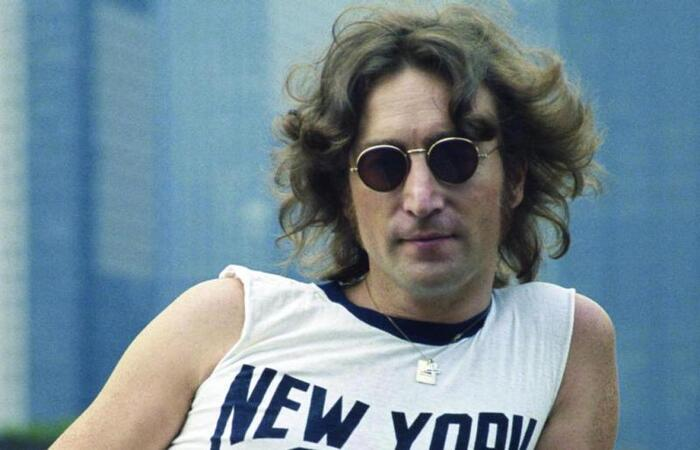

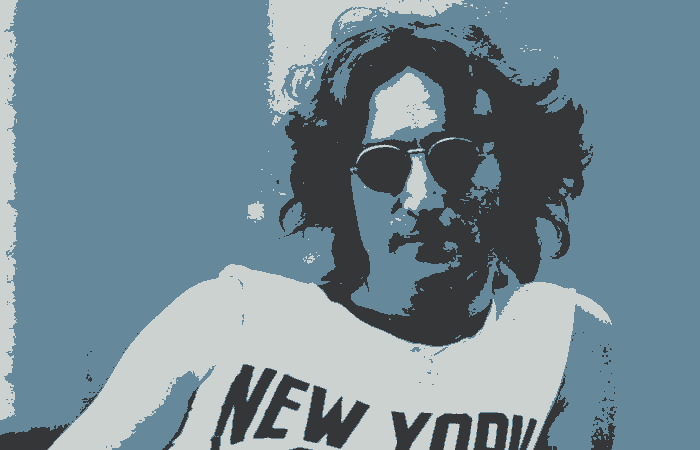

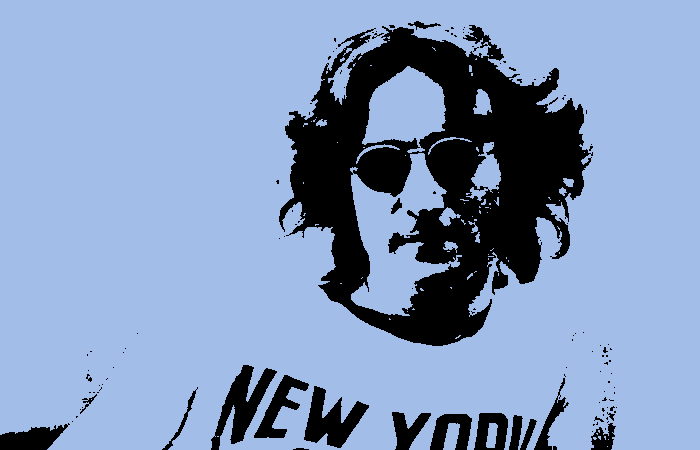

In [64]:
cv2_imshow(img)
cv2_imshow(img_k_means)
cv2_imshow(img_show)

Além deste exemplo foi criada uma versão onde o usuário tem controle sobre as cores por meio de uma interface gráfica
abaixo está o código desta solução

In [ ]:
import cv2 as cv
import numpy as np
from tkinter import Tk
from tkinter.filedialog import askopenfilename

def k_means(n_clusters):
    global res2
    if n_clusters <2:
        n_clusters=2
    n_rodadas = 2
    
    term_crit = (cv.TERM_CRITERIA_COUNT |cv.TERM_CRITERIA_EPS, 10000, 0.0001)
    
    ret,label,center=cv.kmeans(img_copy, n_clusters,None,term_crit,n_rodadas,cv.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))

def change_k_means(n_clusters):
    r_slider_1=cv.getTrackbarPos("Red_Color_1", name_window)
    r_slider_2=cv.getTrackbarPos("Red_Color_2", name_window)
    r_slider_3=cv.getTrackbarPos("Red_Color_3", name_window)
    r_slider_4=cv.getTrackbarPos("Red_Color_4", name_window)
    
    g_slider_1=cv.getTrackbarPos("Green_Color_1", name_window)
    g_slider_2=cv.getTrackbarPos("Green_Color_2", name_window)
    g_slider_3=cv.getTrackbarPos("Green_Color_3", name_window)
    g_slider_4=cv.getTrackbarPos("Green_Color_4", name_window)
    
    b_slider_1=cv.getTrackbarPos("Blue_Color_1", name_window)
    b_slider_2=cv.getTrackbarPos("Blue_Color_2", name_window)
    b_slider_3=cv.getTrackbarPos("Blue_Color_3", name_window)
    b_slider_4=cv.getTrackbarPos("Blue_Color_4", name_window)
    
    k_means(n_clusters)
    colors(r_slider_1,g_slider_1,b_slider_1,r_slider_2,g_slider_2,b_slider_2,
           r_slider_3,g_slider_3,b_slider_3,r_slider_4,g_slider_4,b_slider_4,
           n_clusters)
    final = cv.hconcat([img, res2,img_show])
    cv.imshow(name_window,final)
    
def colors(r_slider_1,g_slider_1,b_slider_1,r_slider_2,g_slider_2,b_slider_2,
           r_slider_3,g_slider_3,b_slider_3,r_slider_4,g_slider_4,b_slider_4,
           n_clusters):
    global img_show
    if n_clusters <2:
        n_clusters=2
    n_rodadas = 2
    
    term_crit = (cv.TERM_CRITERIA_COUNT |cv.TERM_CRITERIA_EPS, 10000, 0.0001)
    
    cor_1 =np.array([[[b_slider_1,g_slider_1,r_slider_1]]],dtype=np.uint8)
    cor_2 =np.array([[[b_slider_2,g_slider_2,r_slider_2]]],dtype=np.uint8)
    cor_3 =np.array([[[b_slider_3,g_slider_3,r_slider_3]]],dtype=np.uint8)
    cor_4 =np.array([[[b_slider_4,g_slider_4,r_slider_4]]],dtype=np.uint8)
    
    cor_1_hsv=cv.cvtColor(cor_1,cv.COLOR_BGR2HSV).flatten()
    cor_2_hsv=cv.cvtColor(cor_2,cv.COLOR_BGR2HSV).flatten()
    cor_3_hsv=cv.cvtColor(cor_3,cv.COLOR_BGR2HSV).flatten()
    cor_4_hsv=cv.cvtColor(cor_4,cv.COLOR_BGR2HSV).flatten()
    
    '''
    ret,label,center=cv.kmeans(img_copy, n_clusters,None,term_crit,n_rodadas,cv.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))
    '''
    
    hsv = cv.cvtColor(res2, cv.COLOR_BGR2HSV)
    img_show_hsv=hsv.copy()
    
    
    all_rgb_codes=res2.reshape(-1, res2.shape[-1])
    co=np.unique(all_rgb_codes, axis=0)
    
    cor_img_1=np.array([[co[0]]])
    cor_img_2=np.array([[co[1]]])

    cor_img_1_hsv=cv.cvtColor(cor_img_1,cv.COLOR_BGR2HSV).flatten()
    if n_clusters==3:
        cor_img_3=np.array([[co[2]]])
        
        cor_img_2_hsv=cv.cvtColor(cor_img_2,cv.COLOR_BGR2HSV).flatten()
        cor_img_3_hsv=cv.cvtColor(cor_img_3,cv.COLOR_BGR2HSV).flatten()
        
        mask = cv.inRange(img_show_hsv,cor_img_1_hsv,cor_img_1_hsv)
        mask2 = cv.inRange(img_show_hsv,cor_img_2_hsv,cor_img_2_hsv)
        mask3 = cv.inRange(img_show_hsv,cor_img_3_hsv,cor_img_3_hsv)
        
        img_show_hsv[mask>0] =  cor_1_hsv
        img_show_hsv[mask2>0] =  cor_2_hsv
        img_show_hsv[mask3>0] =  cor_3_hsv
    elif n_clusters==4:
        cor_img_3=np.array([[co[2]]])
        cor_img_4=np.array([[co[3]]])
        
        cor_img_2_hsv=cv.cvtColor(cor_img_2,cv.COLOR_BGR2HSV).flatten()
        cor_img_3_hsv=cv.cvtColor(cor_img_3,cv.COLOR_BGR2HSV).flatten()
        cor_img_4_hsv=cv.cvtColor(cor_img_4,cv.COLOR_BGR2HSV).flatten()
        
        mask = cv.inRange(img_show_hsv,cor_img_1_hsv,cor_img_1_hsv)
        mask2 = cv.inRange(img_show_hsv,cor_img_2_hsv,cor_img_2_hsv)
        mask3 = cv.inRange(img_show_hsv,cor_img_3_hsv,cor_img_3_hsv)
        mask4 = cv.inRange(img_show_hsv,cor_img_4_hsv,cor_img_4_hsv)
        
        img_show_hsv[mask>0] =  cor_1_hsv
        img_show_hsv[mask2>0] =  cor_2_hsv
        img_show_hsv[mask3>0] =  cor_3_hsv
        img_show_hsv[mask4>0] =  cor_4_hsv
        
    else:
        mask = cv.inRange(img_show_hsv,cor_img_1_hsv,cor_img_1_hsv)
        img_show_hsv[mask>0] =  cor_1_hsv
        img_show_hsv[mask==0] = cor_2_hsv
        
    img_show=cv.cvtColor(img_show_hsv,cv.COLOR_HSV2BGR)


def onChange(slider):
    
    r_slider_1=cv.getTrackbarPos("Red_Color_1", name_window)
    r_slider_2=cv.getTrackbarPos("Red_Color_2", name_window)
    r_slider_3=cv.getTrackbarPos("Red_Color_3", name_window)
    r_slider_4=cv.getTrackbarPos("Red_Color_4", name_window)
    
    g_slider_1=cv.getTrackbarPos("Green_Color_1", name_window)
    g_slider_2=cv.getTrackbarPos("Green_Color_2", name_window)
    g_slider_3=cv.getTrackbarPos("Green_Color_3", name_window)
    g_slider_4=cv.getTrackbarPos("Green_Color_4", name_window)
    
    b_slider_1=cv.getTrackbarPos("Blue_Color_1", name_window)
    b_slider_2=cv.getTrackbarPos("Blue_Color_2", name_window)
    b_slider_3=cv.getTrackbarPos("Blue_Color_3", name_window)
    b_slider_4=cv.getTrackbarPos("Blue_Color_4", name_window)
    
    n_cores = cv.getTrackbarPos("N_Cores", name_window)
    
    colors(r_slider_1,g_slider_1,b_slider_1,r_slider_2,g_slider_2,b_slider_2,
           r_slider_3,g_slider_3,b_slider_3,r_slider_4,g_slider_4,b_slider_4,
           n_cores)
    final = cv.hconcat([img, res2,img_show])
    cv.imshow(name_window,final)

Tk().withdraw()
filename = askopenfilename()

img = cv.imread(filename)
img_copy = img.reshape((-1,3))
img_copy=np.float32(img_copy)

X,Y,Z =img.shape



r_slider_1=0
r_slider_2=0
r_slider_3=0
r_slider_4=0

g_slider_1=0
g_slider_2=0
g_slider_3=0
g_slider_4=0

b_slider_1=0
b_slider_2=0
b_slider_3=0
b_slider_4=0

n_clusters = 2
n_clusters_max=4

slider_max=255

k_means(n_clusters)
colors(r_slider_1,g_slider_1,b_slider_1,r_slider_2,g_slider_2,b_slider_2,
           r_slider_3,g_slider_3,b_slider_3,r_slider_4,g_slider_4,b_slider_4,
           n_clusters)

name_window = "Frame"

cv.namedWindow(name_window,cv.WINDOW_NORMAL)
cv.imshow(name_window,cv.hconcat([img,res2,img_show]))
cv.resizeWindow(name_window,(int(X)*3,int(Y)*3))
cv.createTrackbar("Red_Color_1",name_window,r_slider_1,slider_max,onChange)
cv.createTrackbar("Green_Color_1",name_window,g_slider_1,slider_max,onChange)
cv.createTrackbar("Blue_Color_1",name_window,b_slider_1,slider_max,onChange)

cv.createTrackbar("Red_Color_2",name_window,r_slider_2,slider_max,onChange)
cv.createTrackbar("Green_Color_2",name_window,g_slider_2,slider_max,onChange)
cv.createTrackbar("Blue_Color_2",name_window,b_slider_2,slider_max,onChange)

cv.createTrackbar("Red_Color_3",name_window,r_slider_3,slider_max,onChange)
cv.createTrackbar("Green_Color_3",name_window,g_slider_3,slider_max,onChange)
cv.createTrackbar("Blue_Color_3",name_window,b_slider_3,slider_max,onChange)

cv.createTrackbar("Red_Color_4",name_window,r_slider_4,slider_max,onChange)
cv.createTrackbar("Green_Color_4",name_window,g_slider_4,slider_max,onChange)
cv.createTrackbar("Blue_Color_4",name_window,b_slider_4,slider_max,onChange)

cv.createTrackbar("N_Cores",name_window,n_clusters,n_clusters_max,change_k_means)
cv.waitKey()
cv.destroyAllWindows()

cv.imwrite("img.jpg", res2)
cv.imwrite("img_edit.jpg", img_show)